In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In this code, we implement a multivariate Bayesian classifier in a classification problem. The exercise requires applying this classifier to data from the "heart" database and varying the size of the training sample. Let's follow the specific steps:

In [ ]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate

We use the read.csv function to load data from the "heart" database.


In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/UFMG/Reconhecimento de padrões/heart.dat', sep=' ')
print(heart.shape)
heart

(269, 14)


,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0.1,2.4,2.0.1,3.0,3.0.1,2
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
3,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
4,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
265,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
266,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
267,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


##90% train 10% test

We used the multivariate density expression seen in the classroom to estimate the densities of the two classes. This involves calculations based on the covariance matrix, vector of means and number of features.

In [ ]:
def pdf_multivariate(x, mean, cov, n):
    norm = (1 / np.sqrt(((2 * np.pi) ** n) * np.linalg.det(cov)))
    exp_part = -0.5 * np.dot(np.transpose(x - mean), np.linalg.solve(cov, x - mean))
    return norm * np.exp(exp_part)

We split the data into training (90%) and testing (10%) sets using the train_test_split function.

In [ ]:
xc0 = heart[heart.iloc[:, -1] == 1]
xc1 = heart[heart.iloc[:, -1] == 2]

xc0_train, xc0_test = train_test_split(xc0, test_size=0.1, random_state=42)
xc1_train, xc1_test = train_test_split(xc1, test_size=0.1, random_state=42)

After this, the covariance matrix and mean are calculated

In [ ]:
k0 = xc0_train.iloc[:, 0:13].cov()
k1 = xc1_train.iloc[:, 0:13].cov()
m0 = xc0_train.iloc[:, 0:13].mean()
m1 = xc1_train.iloc[:, 0:13].mean()
n = 13

print("Matriz de Covariância - Classe 0:")
print(k0.to_string())

print("\nMatriz de Covariância - Classe 1:")
print(k1.to_string())

print("\nMédia - Classe 0:")
print(m0.to_string())

print("\nMédia - Classe 1:")
print(m1.to_string())

Matriz de Covariância - Classe 0:
             70.0       1.0       4.0       130.0        322.0       0.0        2.0       109.0     0.0.1       2.4     2.0.1       3.0     3.0.1
70.0    83.903593 -0.810835  0.692040   40.046324   116.490105  0.425207   0.786954  -90.425760  0.140575  0.843925  0.516639  1.223604  1.661194
1.0     -0.810835  0.247872 -0.051244    0.360752    -6.279049  0.031177  -0.026976    1.734439  0.009729  0.006064 -0.006247  0.009674  0.292537
4.0      0.692040 -0.051244  0.802985   -2.329353     3.112438 -0.046269  -0.021891   -3.272139  0.048756 -0.060647 -0.006965  0.019900 -0.064179
130.0   40.046324  0.360752 -2.329353  260.577888   107.956495  1.085738   2.149696   14.426423 -0.144887  2.330669 -0.142178 -0.210337 -0.523881
322.0  116.490105 -6.279049  3.112438  107.956495  3075.800774 -0.984411  12.583527   26.397070  0.497402  1.686987 -1.715810  2.411553 -1.674627
0.0      0.425207  0.031177 -0.046269    1.085738    -0.984411  0.132338   0.003151    0.0

We apply the classifier to the test set and calculate the accuracy. Accuracy is the proportion of correct classifications in the test set in relation to the total number of samples.


In [ ]:
# Amostras de teste
test_samples = pd.concat([xc0_test, xc1_test])
test_samples = test_samples.sample(frac=1)  # Aleatorizar as linhas

# Calcular as probabilidades
M0 = np.zeros(len(test_samples))
M1 = np.zeros(len(test_samples))

for i in range(len(test_samples)):
    M0[i] = pdf_multivariate(test_samples.iloc[i, 0:13].values, m0, k0, n)
    M1[i] = pdf_multivariate(test_samples.iloc[i, 0:13].values, m1, k1, n)
    print(f'\nProbabilidade da Amostra {i+1} ser das classes.')
    print("\033[31m", f'C0: {M0[i]}', "\033[0m", end=" ")
    print("\033[34m", f'C1: {M1[i]}', "\033[0m", end=" ")
    print('\n\n---------------------------------------------------------------')


Probabilidade da Amostra 1 ser das classes.
 C0: 1.4486490704759817e-10   C1: 3.177532480775281e-13  

---------------------------------------------------------------

Probabilidade da Amostra 2 ser das classes.
 C0: 1.3402534178898638e-11   C1: 3.966490301352143e-12  

---------------------------------------------------------------

Probabilidade da Amostra 3 ser das classes.
 C0: 6.164226733059961e-16   C1: 1.9342293287667277e-10  

---------------------------------------------------------------

Probabilidade da Amostra 4 ser das classes.
 C0: 7.063324474198588e-15   C1: 2.9302944441960104e-15  

---------------------------------------------------------------

Probabilidade da Amostra 5 ser das classes.
 C0: 6.7236646372814725e-15   C1: 4.953461465571553e-11  

---------------------------------------------------------------

Probabilidade da Amostra 6 ser das classes.
 C0: 1.9990002009874823e-13   C1: 1.7124039274594446e-13  

-------------------------------------------------------

In [ ]:
# Classificar de acordo com a regra bayesiana
prob0 = len(xc0) / (len(xc0) + len(xc1))
prob1 = len(xc1) / (len(xc0) + len(xc1))
M0 = M0 * prob0
M1 = M1 * prob1
M = M0 / M1

for elemento in np.nditer(M):
    if elemento > 1:
        print("\n\033[34m", elemento, "\033[0m", end=" ")  # Azul
    else:
        print("\n\033[31m", elemento, "\033[0m", end=" ")  # Vermelho


 574.6686308145136  
 4.259168524857239  
 4.017121228375029e-06  
 3.038380731737036  
 0.00017109666815601525  
 1.471468332967197  
 118.60020978886968  
 0.0003626213220237949  
 0.004614125955023152  
 138773.6248592892  
 2.7829015807577893  
 0.5025397188185574  
 6.573609484501713e-09  
 16997.06742238822  
 386.65631768274255  
 0.4062757514848498  
 62.311324838527135  
 0.31447201334622465  
 0.11539849943926782  
 0.3693080713512808  
 774.6814784910069  
 1.1006844726388629e-06  
 1391.0084427593074  
 17.80087653920215  
 77.85971972248996  
 748.2873185821705  
 618.4982814833074  

In [ ]:
  # Classificar as amostras
  M[M >= 1] = 1
  M[M < 1] = 2

  for elemento in np.nditer(M):
      if elemento > 1:
          print("\n\033[31m", elemento, "\033[0m", end=" ")  # Vermelho
      else:
          print("\n\033[34m", elemento, "\033[0m", end=" ")  # Azul


 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 2.0  
 2.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  

In [ ]:
# Verificar quantidade de erros e acertos
truthMatrix = np.zeros((len(test_samples), 4))

for i in range(len(M)):
    if M[i] == 1 and test_samples.iloc[i, 13] == 1:
        truthMatrix[i, 0] = 1
    elif M[i] == 2 and test_samples.iloc[i, 13] == 2:
        truthMatrix[i, 1] = 1
    elif M[i] == 2 and test_samples.iloc[i, 13] == 1:
        truthMatrix[i, 2] = 1
    else:
        truthMatrix[i, 3] = 1

right0 = round(np.sum(truthMatrix[:, 0]) / len(test_samples) * 100, 2)
right1 = round(np.sum(truthMatrix[:, 1]) / len(test_samples) * 100, 2)
wrong0 = round(np.sum(truthMatrix[:, 2]) / len(test_samples) * 100, 2)
wrong1 = round(np.sum(truthMatrix[:, 3]) / len(test_samples) * 100, 2)

train_teste = {
    '90 treino 10 teste': right0+right1,
    '70 treino 30 teste': [],
    '20 treino 80 teste': []
}

data = {
    'classe 0': [f'{round(right0,2)}%', f'{round(wrong0,2)}%'],
    'classe 1': [f'{round(right1,2)}%', f'{round(wrong1,2)}%'],
    'Total': [f'{round(right0+right1,2)}%', f'{round(wrong0+wrong1,2)}%']
}

df = pd.DataFrame(data, index=['acertos (%)', 'erro (%)'])

print(df)

            classe 0 classe 1   Total
acertos (%)   48.15%   33.33%  81.48%
erro (%)       7.41%   11.11%  18.52%


##70% train 30% test


We repeated the previous steps, varying the training sample size to 70% and 20%. This involves rerunning the data splitting, density estimation, and classifier application steps.


In [ ]:
xc0 = heart[heart.iloc[:, -1] == 1]
xc1 = heart[heart.iloc[:, -1] == 2]

xc0_train, xc0_test = train_test_split(xc0, test_size=0.3, random_state=42)
xc1_train, xc1_test = train_test_split(xc1, test_size=0.3, random_state=42)

In [ ]:
# Calcular as matrizes de covariância e médias
k0 = xc0_train.iloc[:, 0:13].cov()
k1 = xc1_train.iloc[:, 0:13].cov()
m0 = xc0_train.iloc[:, 0:13].mean()
m1 = xc1_train.iloc[:, 0:13].mean()
n = 13

print("Matriz de Covariância - Classe 0:")
print(k0.to_string())

print("\nMatriz de Covariância - Classe 1:")
print(k1.to_string())

print("\nMédia - Classe 0:")
print(m0.to_string())

print("\nMédia - Classe 1:")
print(m1.to_string())

Matriz de Covariância - Classe 0:
             70.0       1.0       4.0       130.0        322.0       0.0        2.0       109.0     0.0.1       2.4     2.0.1       3.0     3.0.1
70.0    92.640659 -0.790110  0.841484   46.201374   150.417033  0.310440   1.352473  -90.002198  0.297802  0.659863  0.407967  1.127473  1.791209
1.0     -0.790110  0.245788 -0.061081   -0.252473    -8.466300  0.031593  -0.043681    0.967674  0.006777 -0.011227 -0.002289  0.028755  0.304029
4.0      0.841484 -0.061081  0.705678   -1.502198     3.152106 -0.046703  -0.013187   -2.944689  0.059799  0.021822  0.038919  0.003480  0.014194
130.0   46.201374 -0.252473 -1.502198  242.316484   129.971703  0.773352   2.648901   21.198626 -0.351374  0.548929 -0.940934  0.412363 -3.784341
322.0  150.417033 -8.466300  3.152106  129.971703  3598.172711 -0.243132  14.637912   71.854762  0.657326  0.273471 -1.866300  3.587271 -2.518773
0.0      0.310440  0.031593 -0.046703    0.773352    -0.243132  0.123626   0.015110    0.5

In [ ]:
# Amostras de teste
test_samples = pd.concat([xc0_test, xc1_test])
test_samples = test_samples.sample(frac=1)  # Aleatorizar as linhas

# Calcular as probabilidades
M0 = np.zeros(len(test_samples))
M1 = np.zeros(len(test_samples))

for i in range(len(test_samples)):
    M0[i] = pdf_multivariate(test_samples.iloc[i, 0:13].values, m0, k0, n)
    M1[i] = pdf_multivariate(test_samples.iloc[i, 0:13].values, m1, k1, n)
    print(f'\nProbabilidade da Amostra {i+1} ser das classes.')
    print("\033[31m", f'C0: {M0[i]}', "\033[0m", end=" ")
    print("\033[34m", f'C1: {M1[i]}', "\033[0m", end=" ")
    print('\n\n---------------------------------------------------------------')


Probabilidade da Amostra 1 ser das classes.
 C0: 8.283910005198094e-11   C1: 1.4802308168439429e-15  

---------------------------------------------------------------

Probabilidade da Amostra 2 ser das classes.
 C0: 1.045074187434933e-11   C1: 4.9458390570468215e-11  

---------------------------------------------------------------

Probabilidade da Amostra 3 ser das classes.
 C0: 1.464949764893025e-14   C1: 2.8715816312110426e-16  

---------------------------------------------------------------

Probabilidade da Amostra 4 ser das classes.
 C0: 1.1359718659593743e-17   C1: 9.629601674842097e-14  

---------------------------------------------------------------

Probabilidade da Amostra 5 ser das classes.
 C0: 1.95410597024715e-19   C1: 1.4806897692469157e-14  

---------------------------------------------------------------

Probabilidade da Amostra 6 ser das classes.
 C0: 1.195379601396653e-13   C1: 1.781071933504194e-11  

----------------------------------------------------------

In [ ]:
# Classificar de acordo com a regra bayesiana
prob0 = len(xc0) / (len(xc0) + len(xc1))
prob1 = len(xc1) / (len(xc0) + len(xc1))
M0 = M0 * prob0
M1 = M1 * prob1
M = M0 / M1

for elemento in np.nditer(M):
    if elemento > 1:
        print("\n\033[34m", elemento, "\033[0m", end=" ")  # Azul
    else:
        print("\n\033[31m", elemento, "\033[0m", end=" ")  # Vermelho


 70542.39953036745  
 0.2663492259119981  
 64.30516596945942  
 0.00014869746001786775  
 1.6635211758629165e-05  
 0.008459967179423863  
 3.03416932886362  
 415.6980340090442  
 0.00020710312474868508  
 1.7118354708836336  
 39349.57854480523  
 185.96917023448506  
 0.01568363352754049  
 7.470318729338246  
 5.800001146111032e-11  
 0.40128454970802824  
 818.2988782307236  
 0.024575900226481963  
 0.0006206742289751337  
 388.79872277887796  
 23804.330783228957  
 41.13750580616283  
 6.175419477699825e-05  
 0.34684387313317566  
 26.40100329862804  
 6.677701416509726  
 766.5717914082911  
 3.146101813974827e-05  
 9.569715261284655  
 3.205051333039686e-06  
 2.5789655761851453e-05  
 0.7415577272217602  
 0.20600993733157494  
 17.033210765807617  
 0.0010184824176398266  
 0.033372187164274154  
 0.32090053513698824  
 23.783608577425493  
 248490.93075073807  
 27.34608573816464  
 307.83605316220473  
 0.0008711952218763684  
 4012.005848270577  
 1.2701886010087242e

In [ ]:
# Classificar as amostras
M[M >= 1] = 1
M[M < 1] = 2

for elemento in np.nditer(M):
    if elemento > 1:
        print("\n\033[31m", elemento, "\033[0m", end=" ")  # Vermelho
    else:
        print("\n\033[34m", elemento, "\033[0m", end=" ")  # Azul


 1.0  
 2.0  
 1.0  
 2.0  
 2.0  
 2.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 2.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 2.0  
 2.0  
 2.0  
 1.0  
 2.0  
 2.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 1.0  
 2.0  
 1.0  
 2.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 2.0  
 1.0  
 1.0  
 2.0  
 2.0  
 2.0  
 1.0  
 2.0  
 2.0  
 2.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  

In [ ]:
# Verificar quantidade de erros e acertos
truthMatrix = np.zeros((len(test_samples), 4))

for i in range(len(M)):
    if M[i] == 1 and test_samples.iloc[i, 13] == 1:
        truthMatrix[i, 0] = 1
    elif M[i] == 2 and test_samples.iloc[i, 13] == 2:
        truthMatrix[i, 1] = 1
    elif M[i] == 2 and test_samples.iloc[i, 13] == 1:
        truthMatrix[i, 2] = 1
    else:
        truthMatrix[i, 3] = 1

right0 = round(np.sum(truthMatrix[:, 0]) / len(test_samples) * 100, 2)
right1 = round(np.sum(truthMatrix[:, 1]) / len(test_samples) * 100, 2)
wrong0 = round(np.sum(truthMatrix[:, 2]) / len(test_samples) * 100, 2)
wrong1 = round(np.sum(truthMatrix[:, 3]) / len(test_samples) * 100, 2)

train_teste['70 treino 30 teste'] = right0+right1

data = {
    'classe 0': [f'{round(right0,2)}%', f'{round(wrong0,2)}%'],
    'classe 1': [f'{round(right1,2)}%', f'{round(wrong1,2)}%'],
    'Total': [f'{round(right0+right1,2)}%', f'{round(wrong0+wrong1,2)}%']
}

df = pd.DataFrame(data, index=['acertos (%)', 'erro (%)'])

print(df)

            classe 0 classe 1   Total
acertos (%)   48.15%    35.8%  83.95%
erro (%)       7.41%    8.64%  16.05%


##20% train 80% test


We repeated the previous steps, varying the training sample size to 80% and 20%. This involves rerunning the data splitting, density estimation, and classifier application steps.

In [ ]:
xc0 = heart[heart.iloc[:, -1] == 1]
xc1 = heart[heart.iloc[:, -1] == 2]

xc0_train, xc0_test = train_test_split(xc0, test_size=0.8, random_state=42)
xc1_train, xc1_test = train_test_split(xc1, test_size=0.8, random_state=42)

In [ ]:
# Calcular as matrizes de covariância e médias
k0 = xc0_train.iloc[:, 0:13].cov()
k1 = xc1_train.iloc[:, 0:13].cov()
m0 = xc0_train.iloc[:, 0:13].mean()
m1 = xc1_train.iloc[:, 0:13].mean()
n = 13

print("Matriz de Covariância - Classe 0:")
print(k0.to_string())

print("\nMatriz de Covariância - Classe 1:")
print(k1.to_string())

print("\nMédia - Classe 0:")
print(m0.to_string())

print("\nMédia - Classe 1:")
print(m1.to_string())

Matriz de Covariância - Classe 0:
            70.0        1.0       4.0       130.0        322.0       0.0       2.0       109.0     0.0.1        2.4     2.0.1       3.0      3.0.1
70.0   76.654023  -0.180460 -0.075862   74.518391    78.221839 -0.110345 -0.231034  -70.608046  0.717241   2.180920  1.318391  1.158621   3.257471
1.0    -0.180460   0.254023  0.020690   -0.785057   -11.929885  0.055172 -0.065517   -0.083908  0.020690   0.094023  0.021839  0.110345   0.388506
4.0    -0.075862   0.020690  0.648276    0.282759     6.400000 -0.041379 -0.075862   -2.544828  0.062069  -0.162759 -0.020690  0.020690   0.027586
130.0  74.518391  -0.785057  0.282759  300.378161   195.812644 -0.096552 -2.182759   41.780460  0.420690   0.981149 -1.180460 -2.606897  -9.464368
322.0  78.221839 -11.929885  6.400000  195.812644  2845.495402 -1.220690  9.727586   79.111494  3.434483 -11.941609 -7.208046  0.903448 -20.105747
0.0    -0.110345   0.055172 -0.041379   -0.096552    -1.220690  0.165517  0.062069  

In [ ]:
# Amostras de teste
test_samples = pd.concat([xc0_test, xc1_test])
test_samples = test_samples.sample(frac=1)  # Aleatorizar as linhas

# Calcular as probabilidades
M0 = np.zeros(len(test_samples))
M1 = np.zeros(len(test_samples))

for i in range(len(test_samples)):
    M0[i] = pdf_multivariate(test_samples.iloc[i, 0:13].values, m0, k0, n)
    M1[i] = pdf_multivariate(test_samples.iloc[i, 0:13].values, m1, k1, n)
    print(f'\nProbabilidade da Amostra {i+1} ser das classes.')
    print("\033[31m", f'C0: {M0[i]}', "\033[0m", end=" ")
    print("\033[34m", f'C1: {M1[i]}', "\033[0m", end=" ")
    print('\n\n---------------------------------------------------------------')


Probabilidade da Amostra 1 ser das classes.
 C0: 2.4387307500348115e-12   C1: 3.3646922369356556e-17  

---------------------------------------------------------------

Probabilidade da Amostra 2 ser das classes.
 C0: 1.6602026771545037e-14   C1: 1.9133183201565572e-17  

---------------------------------------------------------------

Probabilidade da Amostra 3 ser das classes.
 C0: 6.2767571198314116e-12   C1: 7.271531739948712e-14  

---------------------------------------------------------------

Probabilidade da Amostra 4 ser das classes.
 C0: 1.6876808766900138e-12   C1: 4.282170242702715e-12  

---------------------------------------------------------------

Probabilidade da Amostra 5 ser das classes.
 C0: 5.452604562247882e-15   C1: 1.2142584556754273e-15  

---------------------------------------------------------------

Probabilidade da Amostra 6 ser das classes.
 C0: 2.529295653521354e-12   C1: 1.896796559530551e-15  

-------------------------------------------------------

In [ ]:
# Classificar de acordo com a regra bayesiana
prob0 = len(xc0) / (len(xc0) + len(xc1))
prob1 = len(xc1) / (len(xc0) + len(xc1))
M0 = M0 * prob0
M1 = M1 * prob1
M = M0 / M1

for elemento in np.nditer(M):
    if elemento > 1:
        print("\n\033[34m", elemento, "\033[0m", end=" ")  # Azul
    else:
        print("\n\033[31m", elemento, "\033[0m", end=" ")  # Vermelho


 91361.41259642714  
 1093.7502809378414  
 108.80621862667375  
 0.49678754360340616  
 5.660270207460535  
 1680.827489135362  
 897.1410775972882  
 16.886368320534206  
 2.475610676641848  
 8.166280818265552e+29  
 81109.56749689141  
 3.029180672340988e-07  
 8303258266403901.0  
 0.005297109480044318  
 5.698730988697458  
 118344.01153295455  
 1.416280621230926  
 355289050.9450801  
 0.00046582914610993417  
 38.8018290940956  
 0.126199046835846  
 0.01610233134943954  
 7089410862755.841  
 4762147552726.585  
 5.672488514205212e-07  
 1.99872933947605e-06  
 5836.391099609223  
 10180670129.45665  
 1.2447248462504126e-05  
 0.01050314307302421  
 126.95099154024811  
 1.5413601394002099  
 281625.3597571869  
 532950017900713.8  
 6.301302199955489e-06  
 5539.953551734313  
 2.1845643768653856e+16  
 2171842520.7800794  
 0.005655577463284485  
 661.52841721762  
 0.029733615362036232  
 92419667.57432762  
 1.1657360777927303e+23  
 0.044136622940353566  
 9.4034804574

In [ ]:
# Classificar as amostras
M[M >= 1] = 1
M[M < 1] = 2

for elemento in np.nditer(M):
    if elemento > 1:
        print("\n\033[31m", elemento, "\033[0m", end=" ")  # Vermelho
    else:
        print("\n\033[34m", elemento, "\033[0m", end=" ")  # Azul


 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 2.0  
 2.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 2.0  
 2.0  
 2.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 2.0  
 1.0  
 2.0  
 2.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 2.0  
 1.0  
 2.0  
 1.0  
 1.0  
 1.0  
 1.0  
 2.0  
 1.0  
 2.0  
 2.0  
 2.0 

In [ ]:
# Verificar quantidade de erros e acertos
truthMatrix = np.zeros((len(test_samples), 4))

for i in range(len(M)):
    if M[i] == 1 and test_samples.iloc[i, 13] == 1:
        truthMatrix[i, 0] = 1
    elif M[i] == 2 and test_samples.iloc[i, 13] == 2:
        truthMatrix[i, 1] = 1
    elif M[i] == 2 and test_samples.iloc[i, 13] == 1:
        truthMatrix[i, 2] = 1
    else:
        truthMatrix[i, 3] = 1

right0 = round(np.sum(truthMatrix[:, 0]) / len(test_samples) * 100, 2)
right1 = round(np.sum(truthMatrix[:, 1]) / len(test_samples) * 100, 2)
wrong0 = round(np.sum(truthMatrix[:, 2]) / len(test_samples) * 100, 2)
wrong1 = round(np.sum(truthMatrix[:, 3]) / len(test_samples) * 100, 2)

train_teste['20 treino 80 teste'] = right0+right1

data = {
    'classe 0': [f'{round(right0,2)}%', f'{round(wrong0,2)}%'],
    'classe 1': [f'{round(right1,2)}%', f'{round(wrong1,2)}%'],
    'Total': [f'{round(right0+right1,2)}%', f'{round(wrong0+wrong1,2)}%']
}

df = pd.DataFrame(data, index=['acertos (%)', 'erro (%)'])

print(df)

            classe 0 classe 1   Total
acertos (%)   45.83%   23.15%  68.98%
erro (%)       9.72%    21.3%  31.02%


##Final considerations


In [ ]:
train_teste

{'90 treino 10 teste': 81.47999999999999,
 '70 treino 30 teste': 83.94999999999999,
 '20 treino 80 teste': 68.97999999999999}

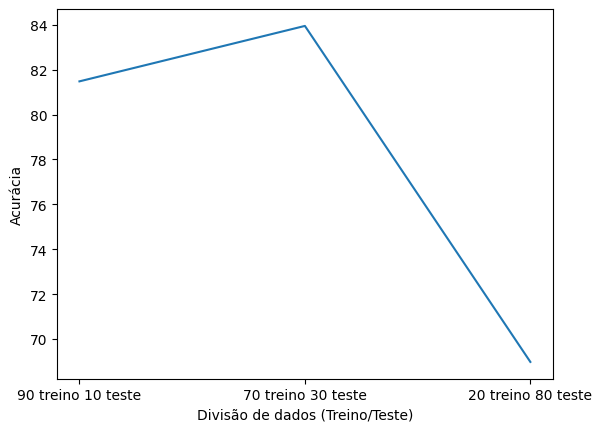

In [ ]:
X_axis = list(train_teste.keys())
Y_axis = list(train_teste.values())

plt.figure()
plt.plot(X_axis, Y_axis)
plt.xlabel('Divisão de dados (Treino/Teste)')
plt.ylabel('Acurácia')
plt.show()

The method worked well in most cases, resulting in accurate classifications and a consistent standard deviation. However, we noticed that the classification effectiveness was reduced when we used a smaller number of training samples. In summary, the model was effective in most scenarios, but had difficulty generalizing when the training set size was reduced.
